# STEP-2: Exploratory Data Analysis

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv("../data/processed/cleaned_superstore.csv")


In [45]:
monthly_sales = df.groupby(["Order Year", "Order Month Name"])["Sales"].sum().reset_index()
monthly_sales.head()

,Order Year,Order Month Name,Sales
0,2015,April,27906.8550
1,2015,August,27117.5365
2,2015,December,68167.0585
3,2015,February,4519.8920
4,2015,January,14205.7070


In [46]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Year-Month"] = df["Order Date"].dt.to_period("M")


In [47]:
df["Year-Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Year-Month")["Sales"].sum().reset_index()

monthly_sales["Year-Month"] = monthly_sales["Year-Month"].astype(str)

monthly_sales.head()

,Year-Month,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


 ## Monthly Revenue Trend Analysis

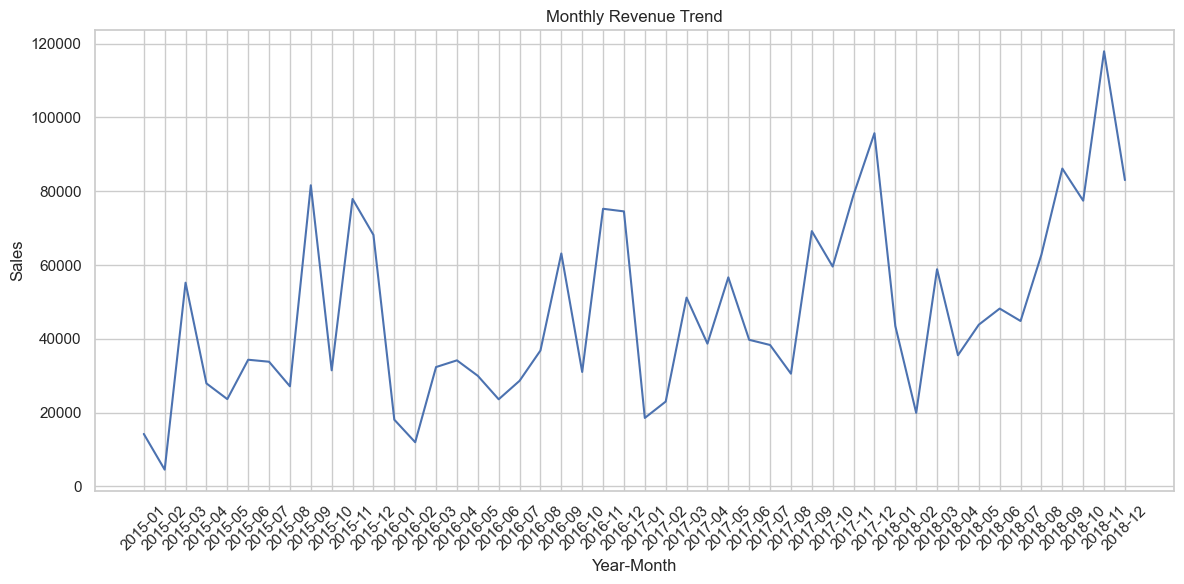

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Year-Month", y="Sales")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.savefig("../images/Monthly_Revenue_Trend.png", dpi=300, bbox_inches="tight")

plt.show()


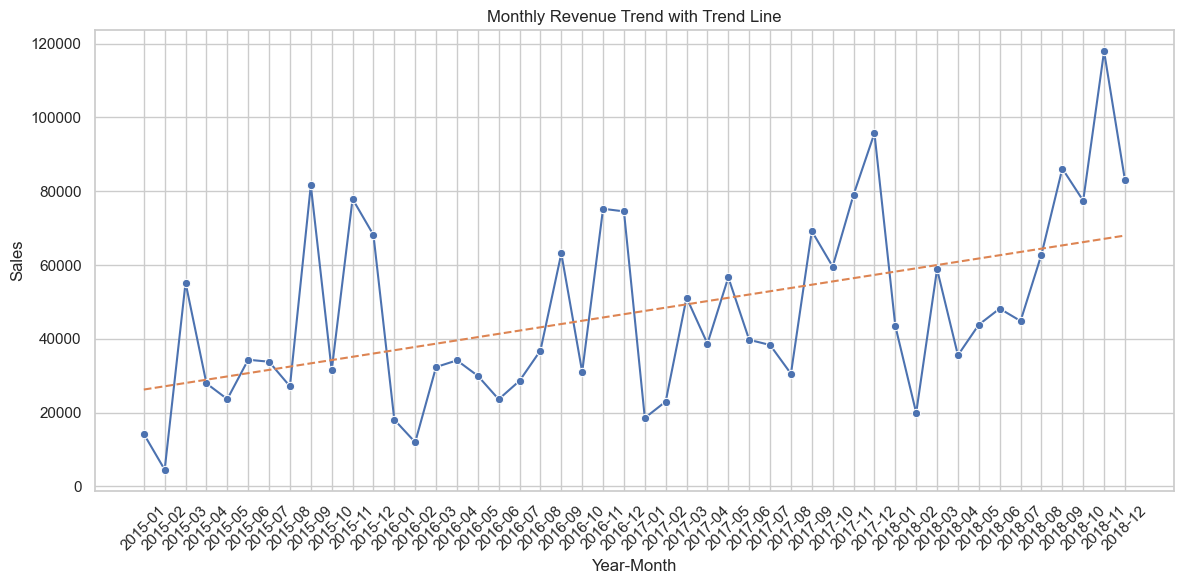

In [56]:
#OPTIONAL 
import numpy as np

plt.figure(figsize=(12,6))

sns.lineplot(data=monthly_sales, x="Year-Month", y="Sales", marker="o")

# Add trend line
z = np.polyfit(range(len(monthly_sales)), monthly_sales["Sales"], 1)
p = np.poly1d(z)
plt.plot(monthly_sales["Year-Month"], p(range(len(monthly_sales))), linestyle="--")

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend with Trend Line")
plt.tight_layout()

plt.savefig("../images/Monthly_Revenue_Trend_Advanced.png", dpi=300, bbox_inches="tight")

plt.show()


## Insight 1: Monthly Revenue Trend

The company shows a clear upward revenue trend from 2015 to 2018, indicating steady business growth.

Revenue spikes are visible toward the end of each year (Q4), suggesting strong seasonal effects likely driven by holiday sales.

A noticeable dip is observed in February 2018, which may indicate post-holiday slowdown or seasonal demand variation.

## Sales Analysis

In [50]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

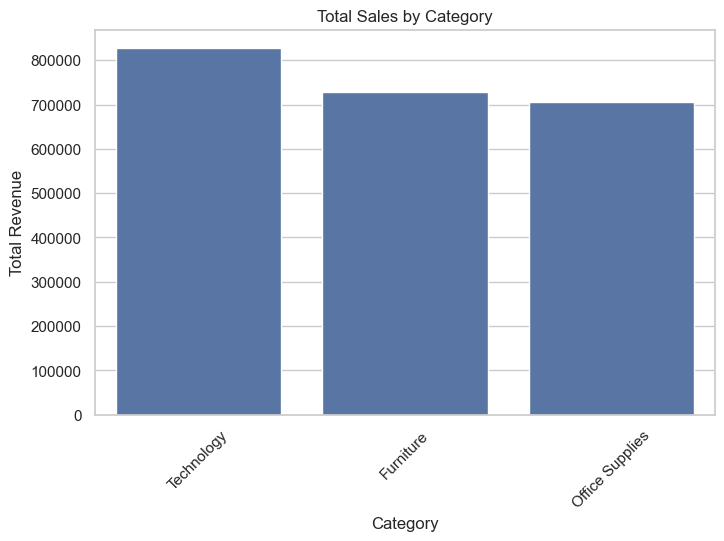

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

plt.savefig("../images/Sales_by_Category.png", dpi=300, bbox_inches="tight")

plt.show()

## Insight 2: Sales by Category

Technology is the highest revenue-generating category, contributing the largest share of total sales.

Furniture ranks second, followed by Office Supplies.

This suggests that customers are spending more on high-value technology products compared to everyday office items. 

The company may consider:
- Expanding technology product lines
- Increasing marketing for high-margin tech items
- Evaluating profit margins across categories

## Top Performing Sub-Categories

In [52]:
sub_category_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
sub_category_sales.head(10)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

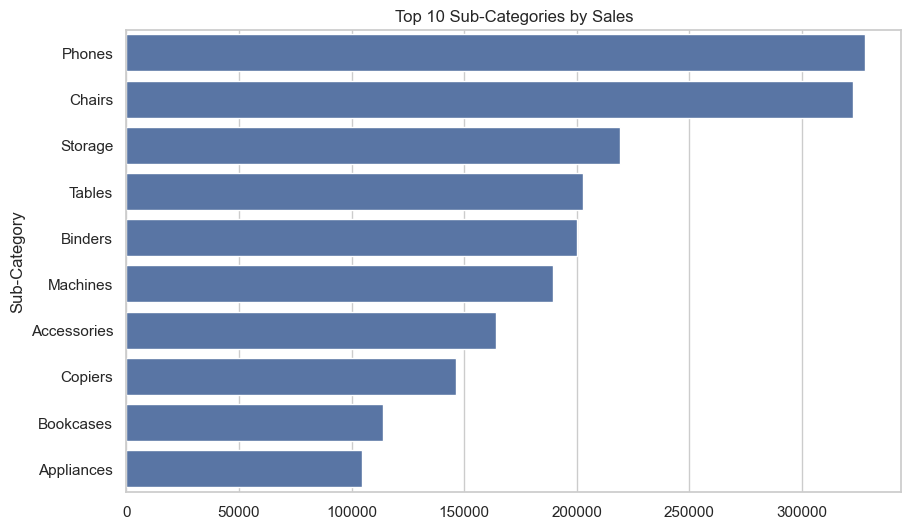

In [58]:
top10 = sub_category_sales.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Sub-Categories by Sales")

plt.savefig("../images/Top_Performing_Sub-Categories.png", dpi=300, bbox_inches="tight")

plt.show()

## Insight 4: Top Performing Sub-Categories

Phones generate the highest revenue among all sub-categories, making them the strongest revenue driver for the company.

Chairs and Storage also contribute significantly to total sales, indicating strong demand in both Technology and Furniture segments.

The dominance of Phones suggests that customers prioritize communication devices and high-value electronics.

Lower-performing sub-categories such as Appliances and Bookcases contribute comparatively less revenue, which may require:
- Targeted promotions
- Bundling strategies
- Pricing optimization

The company should consider expanding high-demand sub-categories like Phones while reviewing the profitability and marketing strategy of lower-performing segments.

## Regional Sales Performance

In [54]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

## Insight 5: Regional Sales Performance

The West region generates the highest total revenue, followed closely by the East region. 
This indicates strong market presence and customer demand in these areas.

The South region contributes the least revenue among all regions, suggesting potential growth opportunities.

The company may consider:
- Increasing marketing investments in the South region
- Analyzing customer demographics in high-performing regions (West & East)
- Replicating successful strategies from West into lower-performing regions